In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/coooodek/requestLog/refs/heads/main/dataset/processedData.csv", dtype={"분기": "int32", "연도": "int32"})

df['요청일'] = pd.to_datetime(df['요청일'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   기술검토번호    4510 non-null   object        
 1   요청일       4510 non-null   datetime64[ns]
 2   제품그룹      4510 non-null   object        
 3   Location  4510 non-null   object        
 4   담당자       4510 non-null   object        
 5   분기        4510 non-null   int32         
 6   연도        4510 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 211.5+ KB


In [5]:
# 2025 접수 데이터

df2 = df[df['요청일'].dt.year == 2025]
df2.head(1)

,기술검토번호,요청일,제품그룹,Location,담당자,분기,연도
0,ME25-636,2025-11-18 16:26:00,A,국내,김*민,4,2025


In [6]:
workgraph = df2.groupby(['담당자', '제품그룹'])['제품그룹'].size().unstack(fill_value = 0)
workgraph

제품그룹,A,B,C,D,E,ETC,F,G,H,I,J,K,L,M,O,R
담당자,,,,,,,,,,,,,,,,
권*태,1,2,0,0,0,1,0,0,1,0,0,0,20,9,1,0
김*민,12,5,0,1,8,0,6,2,1,76,0,19,16,2,1,1
나*준,2,0,0,0,11,0,6,3,0,34,0,0,1,0,0,1
남*모,5,16,0,2,39,1,2,36,1,1,0,14,0,0,0,1
노*경,0,3,34,2,40,3,6,7,2,8,8,21,0,0,0,0
박*호,2,1,0,28,22,1,4,11,2,3,3,13,5,0,3,0


In [7]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

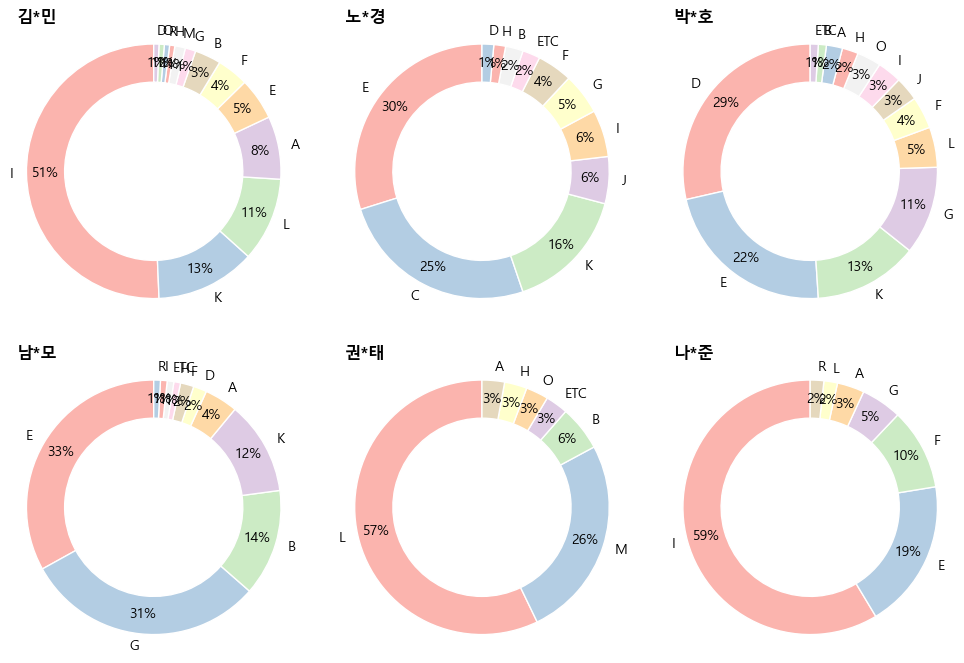

In [111]:
# 도넛 차트

rows = 2
columns = 3

fig, axes = plt.subplots(rows, columns, figsize = (4*columns, 4*rows))
axes = axes.flatten()

coworker = df2['담당자'].unique()

colors = plt.cm.Pastel1.colors

for i, p in enumerate(coworker):
    df_person = df2[df2['담당자'] == p]
    product_counts = df_person['제품그룹'].value_counts()

    axes[i].pie(
        product_counts.values,
        labels = product_counts.index,
        startangle = 90,
        autopct = '%1.0f%%',
        pctdistance = 0.85,
        labeldistance = 1.1,
        wedgeprops = dict(width = 0.3, edgecolor = 'white'),
        colors = colors
    )
    axes[i].set_title((f"{p}"), loc = 'left', fontweight = 'bold')
    axes[i].axis('equal')

plt.show()

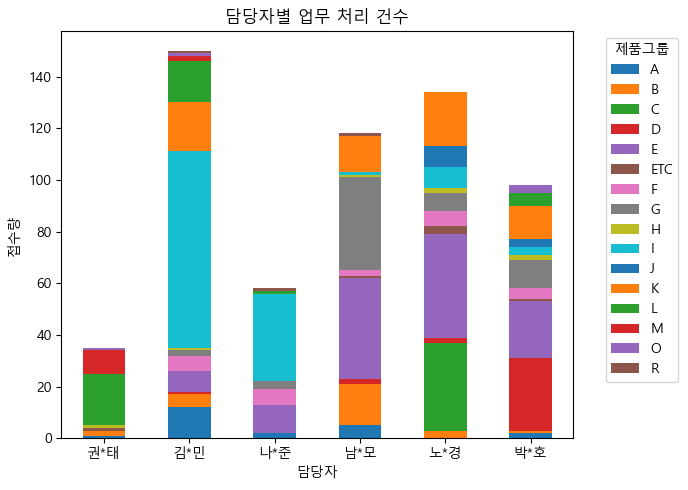

In [ ]:
# 누적 막대 그래프 (색 중복됨, 개인별 총 업무 처리량을 볼 수 있음)

workgraph.plot(
    kind = 'bar',
    stacked = True,
    figsize = (7, 5)
)

plt.title('담당자별 업무 처리 건수')
plt.xlabel('담당자')
plt.xticks(rotation = 0)
plt.ylabel('접수량')
plt.legend(title = '제품그룹', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

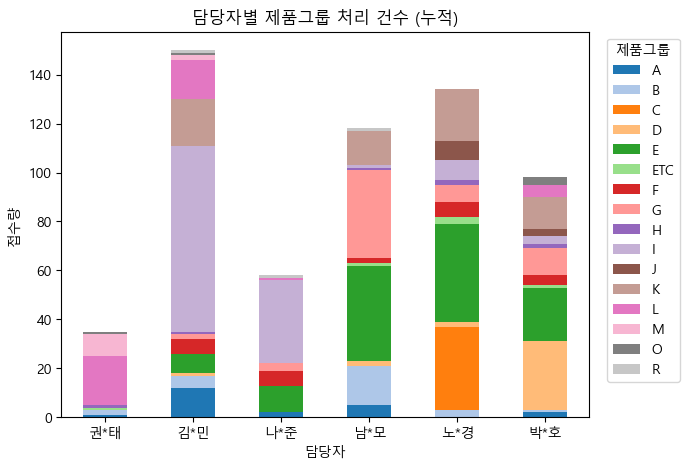

In [110]:
# 누적 막대 그래프 (컬러 추가)

cmap = plt.get_cmap('tab20')
colors = cmap.colors[:workgraph.shape[1]]

ax = workgraph.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    color=colors
)

ax.set_xlabel('담당자')
ax.set_ylabel('접수량')
ax.set_title('담당자별 제품그룹 처리 건수 (누적)')
plt.legend(
    title='제품그룹',
    bbox_to_anchor = (1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

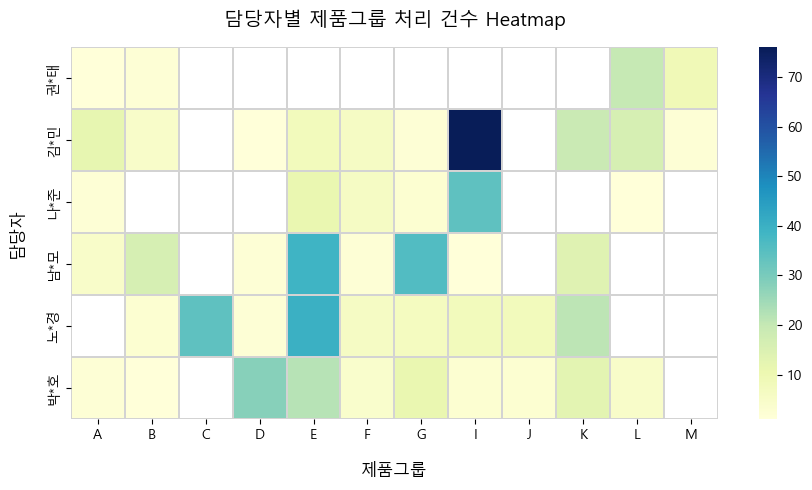

In [ ]:
# 히트맵

df3 = df2.copy()
df3 = df3[~df3['제품그룹'].isin(['ETC', 'H', 'O', 'R'])]

pivot = (
    df3
    .groupby(['담당자', '제품그룹'])
    .size()
    .unstack(fill_value = 0)
)

plt.figure(figsize = (9, 5))
sns.heatmap(
    pivot,
    mask=(pivot <= 0),
    cmap = 'YlGnBu',
    linewidths = 0.05,
    linecolor = 'lightgray'
)

plt.title('담당자별 제품그룹 처리 건수 Heatmap', fontsize = 14, pad = 15)
plt.xlabel('제품그룹', fontsize = 12, labelpad = 15)
plt.ylabel('담당자', fontsize = 12, labelpad = 15)
plt.tight_layout(rect = [0, 0, 1, 1])
plt.show()